In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import defaultdict

In [6]:
#from google.colab import drive
#drive.mount('/content/drive')

In [7]:
import json
file_name = r"column_desc.json"

with open(file_name, 'r', encoding='utf-8') as f:
  col_desc = json.load(f)

In [8]:
ip = r'data/FRBNY.xlsx'
df = pd.read_excel(ip, sheet_name = "Data", skiprows=1, engine="openpyxl")
df.head()

,userid,date,weight,N1_1,N1_2,N1_3,N1_4,N1_5,N1_6,N1_7,...,N21_2,N21_3,N21_4,N21_5,N21_6,N21_7,N22,N23,N24,N25
0,70000337,201310,5.382,0,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,70000341,201310,0.557,1,1,1,0,1,0,0,...,75.0,90.0,95.0,NaN,85.0,98.0,NaN,NaN,NaN,NaN
2,70003202,201310,0.868,0,1,0,0,0,0,0,...,60.0,95.0,NaN,NaN,95.0,NaN,NaN,NaN,NaN,NaN
3,70003205,201310,0.422,1,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,70003238,201310,0.638,0,1,0,0,0,0,0,...,100.0,100.0,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN


In [9]:
df.shape

(29304, 140)

## Handling missing values

In [10]:
isna = df.isna().sum()
isna.head()

userid    0
date      0
weight    1
N1_1      0
N1_2      0
dtype: int64

### First 70 columns

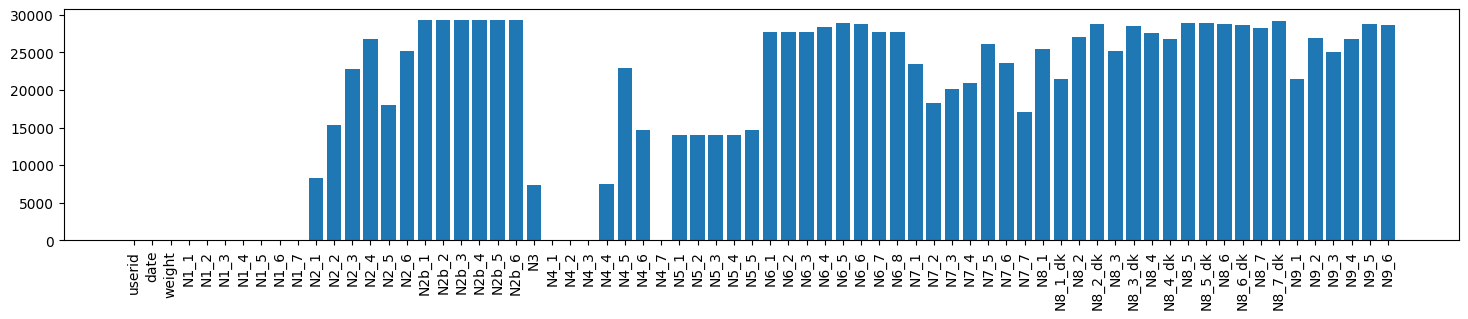

In [11]:
plt.figure(figsize = (18, 3))
plt.bar(isna.index[:70], isna[:70])
plt.xticks(rotation='vertical')
plt.show()

### Last 70 columns

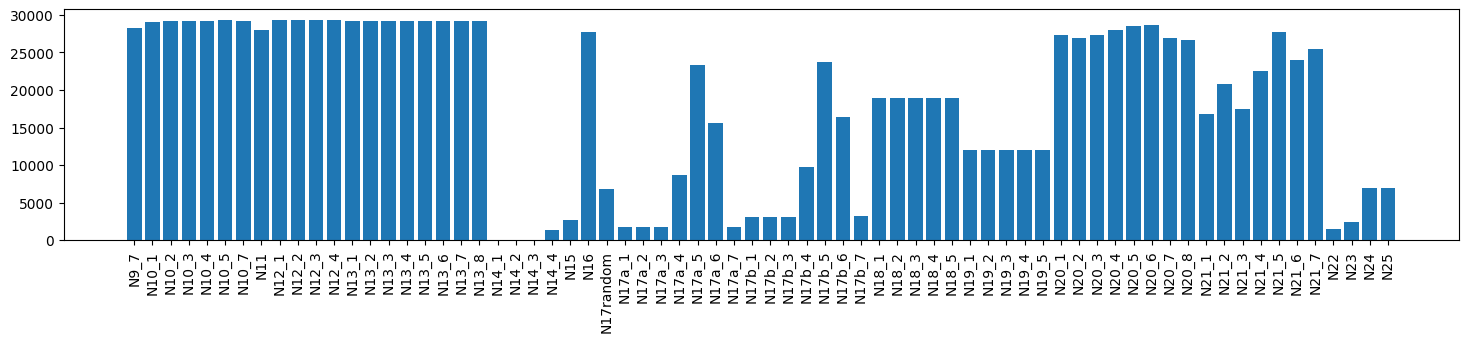

In [12]:
plt.figure(figsize = (18, 3))
plt.bar(isna.index[70:], isna[70:])
plt.xticks(rotation='vertical')
plt.show()

Get column description from the json

In [42]:
def get_column_details(col_name):
  if col_name in col_desc.keys():
    return col_desc[col_name]
  else:
    return "----------- not available -----------"

Number of columns having missing values lesser than x%

In [43]:
print(len(isna[isna/df.shape[0]*100 < 5]), "cols") #missing values less than 5%
print(len(isna[isna/df.shape[0]*100 < 10]), "cols")
print(len(isna[isna/df.shape[0]*100 < 15]), "cols")
print(len(isna[isna/df.shape[0]*100 < 20]), "cols")
print(len(isna[isna/df.shape[0]*100 < 25]), "cols")
print(len(isna[isna/df.shape[0]*100 < 30]), "cols")

1 cols
1 cols
1 cols
1 cols
1 cols
1 cols


In [44]:
for col in isna[isna/df.shape[0]*100 < 5].index: #missing values less than 5%
  print(col,"*"*5, get_column_details(col))

0 ***** ----------- not available -----------


In [45]:
isna[isna/df.shape[0]*100 < 5].index

RangeIndex(start=0, stop=1, step=1)

## Questions-Answers(choosing atleast one option)

### Group the similar columns - (Similar question with different options)

In [46]:
questions_grouping = []
cols = df.columns

for i in range(1, 26):
  r = re.compile(f"N{str(i)}_.*")
  options = list(filter(r.match, cols))
  if len(options)>0:
    questions_grouping.append(options)

for i in range(1, 26):
  r = re.compile(f"N{str(i)}a_.*")
  options = list(filter(r.match, cols))
  if len(options)>0:
    questions_grouping.append(options)

for i in range(1, 26):
  r = re.compile(f"N{str(i)}b_.*")
  options = list(filter(r.match, cols))
  if len(options)>0:
    questions_grouping.append(options)

for i in range(1, 26):
  r = re.compile(f"N{str(i)}$")
  options = list(filter(r.match, cols))
  if len(options)>0:
    questions_grouping.append(options)

questions_grouping[:5], len(questions_grouping)

([['N1_1', 'N1_2', 'N1_3', 'N1_4', 'N1_5', 'N1_6', 'N1_7'],
  ['N2_1', 'N2_2', 'N2_3', 'N2_4', 'N2_5', 'N2_6'],
  ['N4_1', 'N4_2', 'N4_3', 'N4_4', 'N4_5', 'N4_6', 'N4_7'],
  ['N5_1', 'N5_2', 'N5_3', 'N5_4', 'N5_5'],
  ['N6_1', 'N6_2', 'N6_3', 'N6_4', 'N6_5', 'N6_6', 'N6_7', 'N6_8']],
 27)

### Count the number of users answered the question (choosing atleast one option)

In [47]:
ind = {}
all_index = set(list(range(len(df))))

for options in questions_grouping:
  qn_key = options[0].split("_")[0]
  ind[qn_key] = None

  for col in options:

    null_index = set(list(df.loc[pd.isna(df[col]), :].index))
    not_null_index = all_index-null_index

    if ind[qn_key] == None:
      ind[qn_key] = not_null_index
    else:
      ind[qn_key].update(not_null_index)


Counting the number of users answered atleast one option in that question

In [48]:
count_users = pd.Series([0]*len(ind.keys()),index=ind.keys())

In [49]:
for k,v in ind.items():
  count_users[k]  = len(v)
count_users

N1      29304
N2      25564
N4      29299
N5      15333
N6       1631
N7      13190
N8      13416
N9      13383
N10       552
N12        34
N13       143
N14     29304
N18     10385
N19     17283
N20      2679
N21     19615
N17a    27604
N2b        60
N17b    26194
N3      21903
N11      1371
N15     26670
N16      1608
N22     27856
N23     26811
N24     22286
N25     22280
dtype: int64

### Percentage of users answered the question(atleast one option)

Example: N1 is 100 -> Question N1 has ['N1_1', 'N1_2', 'N1_3', 'N1_4', 'N1_5', 'N1_6', 'N1_7'] different options. It is 100% because all the users has answered atleast one option

In [55]:
count_users/df.shape[0]*100 # for N6 -> 5% data available, 95% missing data

N1      100.000000
N2       87.237237
N4       99.982937
N5       52.323915
N6        5.565793
N7       45.010920
N8       45.782146
N9       45.669533
N10       1.883702
N12       0.116025
N13       0.487988
N14     100.000000
N18      35.438848
N19      58.978296
N20       9.142097
N21      66.936254
N17a     94.198744
N2b       0.204750
N17b     89.387114
N3       74.744062
N11       4.678542
N15      91.011466
N16       5.487305
N22      95.058695
N23      91.492629
N24      76.051051
N25      76.030576
dtype: float64

if 90% data is considered

In [53]:
count_users[count_users/df.shape[0]*100 > 90] #90% data available, 10% missing

N1      29304
N4      29299
N14     29304
N17a    27604
N15     26670
N22     27856
N23     26811
dtype: int64

if 70% data is considered

In [52]:
count_users[count_users/df.shape[0]*100 > 70] #70% data available, 30% missing

N1      29304
N2      25564
N4      29299
N14     29304
N17a    27604
N17b    26194
N3      21903
N15     26670
N22     27856
N23     26811
N24     22286
N25     22280
dtype: int64

### Plot count of users answered each question and its answers distribution (respective to the options)

In [33]:
isna = pd.DataFrame(df.isna().sum()).transpose()
notna = len(df) - isna
notna.head()

,userid,date,weight,N1_1,N1_2,N1_3,N1_4,N1_5,N1_6,N1_7,...,N21_2,N21_3,N21_4,N21_5,N21_6,N21_7,N22,N23,N24,N25
0,29304,29304,29303,29304,29304,29304,29304,29304,29304,29304,...,8451,11800,6709,1530,5257,3901,27856,26811,22286,22280


In [34]:
len(questions_grouping)

27

In [35]:
def plot_isna(ax, i , j, qns):
  ax[i,j].bar(qns, notna[qns].values.tolist()[0])
  ax[i,j].set_ylim(0, len(df))
  ax[i,j].tick_params(axis='x', labelrotation=90)

example: for the first plot N1: all the users have values for all the options: there is no nan

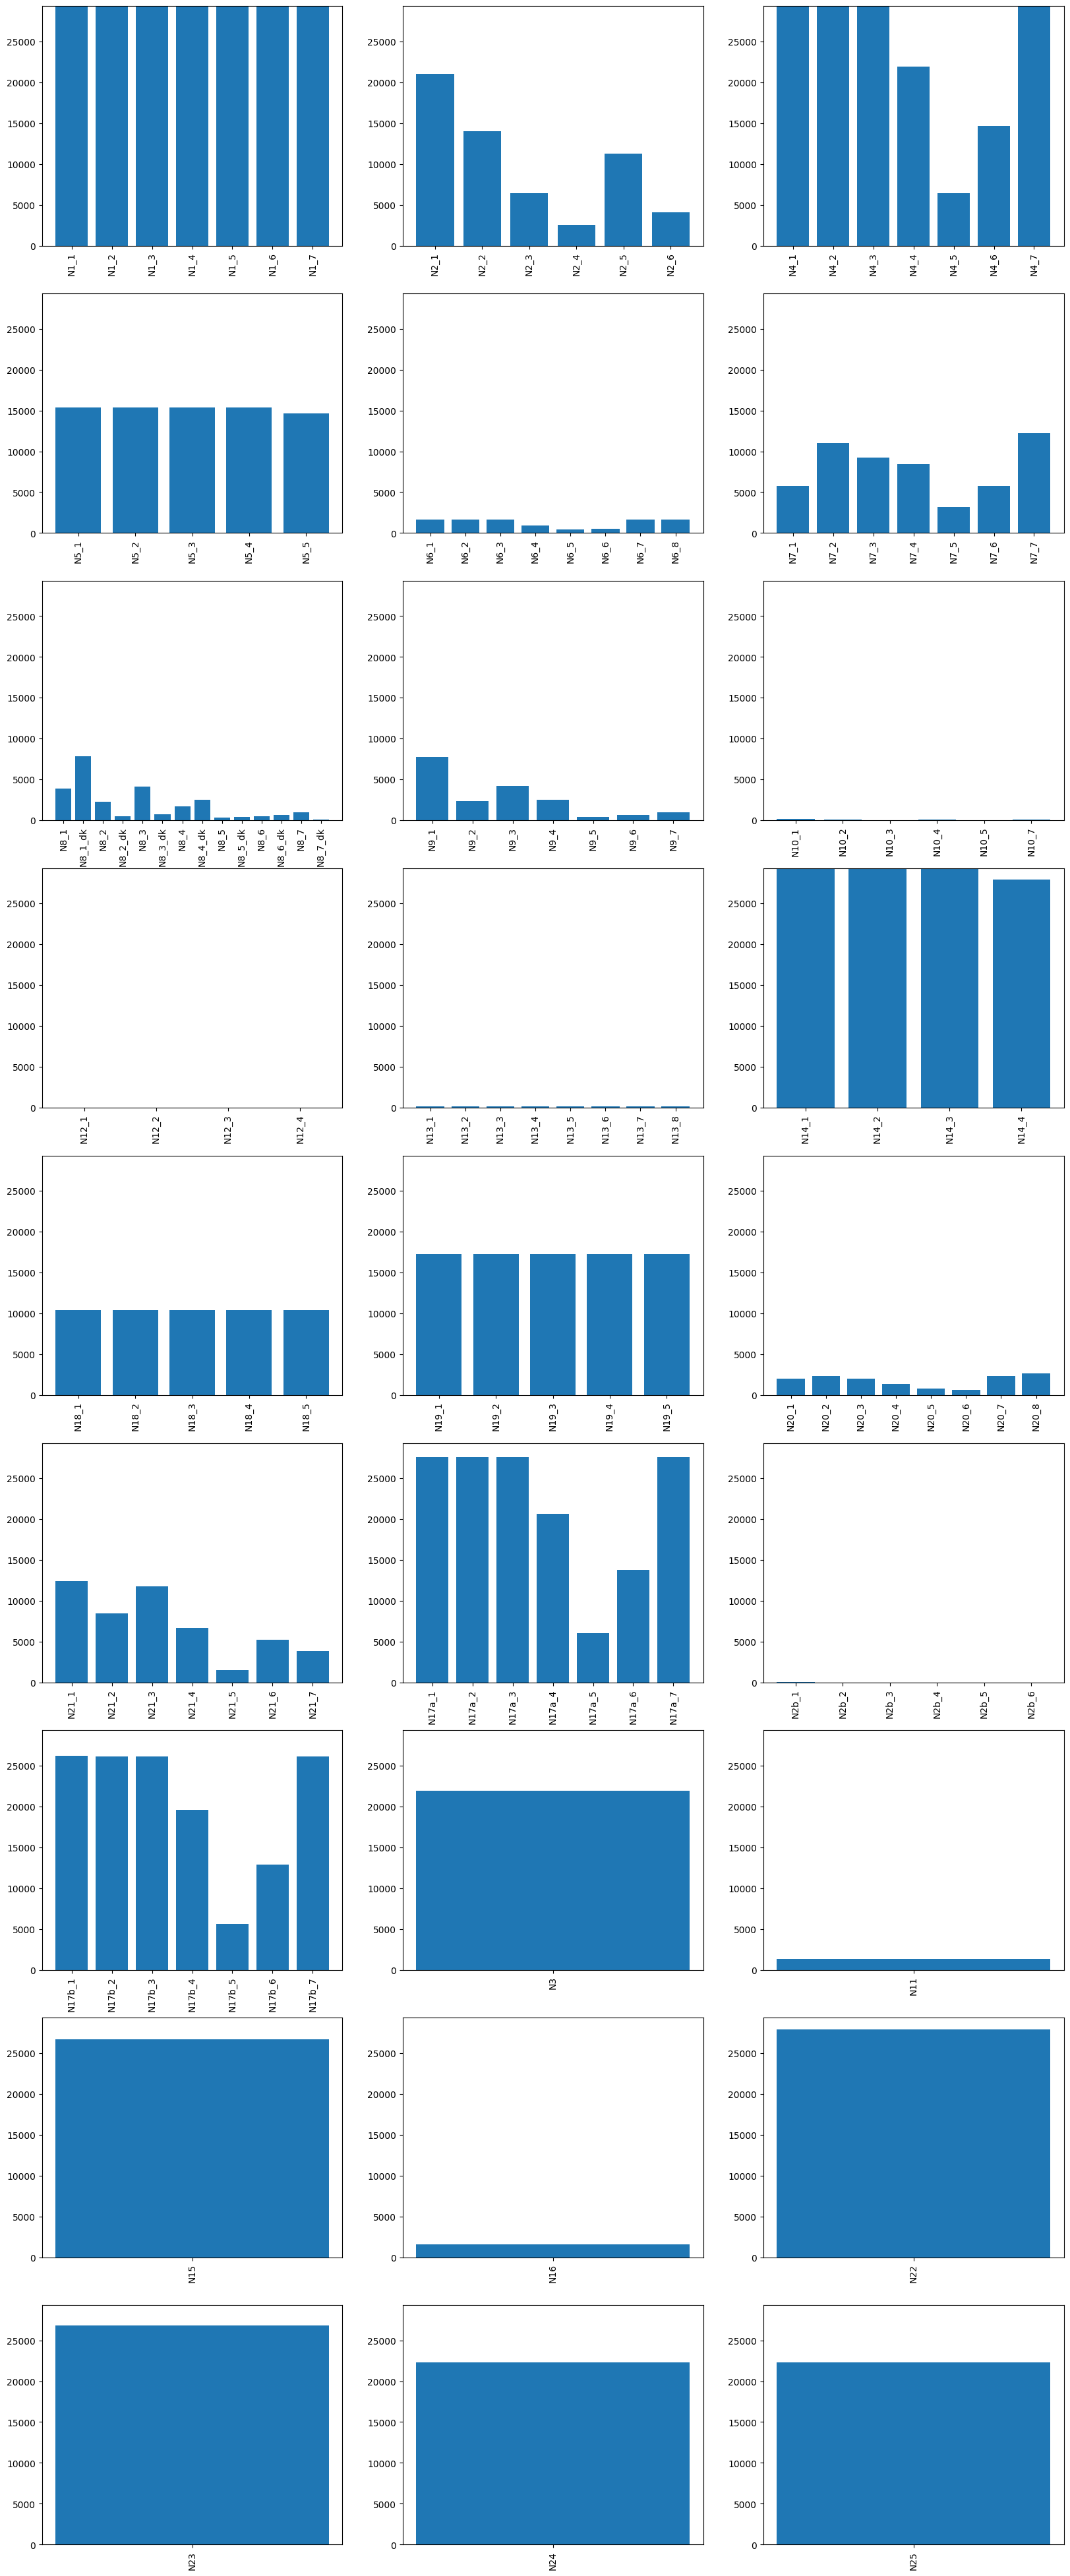

In [36]:
fig, ax = plt.subplots(9,3, figsize = (20, 50))

k=0
for i in range(9):
  for j in range(3):
    plot_isna(ax, i, j, questions_grouping[k])
    k += 1